In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')


In [3]:
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [4]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(4)
    return p

In [5]:
df['returns'] = df.market_value.pct_change(1)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1)) #ARMA ( order(P,Q)) P->AR components , Q ->AM components
results_ret_ma_1 = model_ret_ma_1.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_1.pvalues)):
  print(round(results_ret_ma_1.pvalues,3))

#we assume that time series for returns are stationary

Variables        pvalues
const            0.245
ma.L1.returns    0.086
dtype: float64


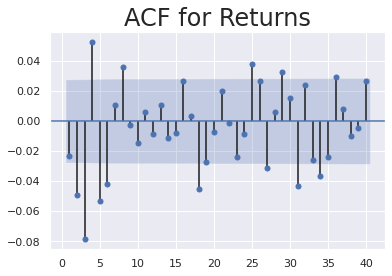

In [7]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

Higher lags

In [8]:
#AR(2)
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_2.pvalues)):
  print(round(results_ret_ma_2.pvalues,3))
print("LLR test        ",LLR_test(results_ret_ma_1, results_ret_ma_2))

Variables        pvalues
const            0.215
ma.L1.returns    0.022
ma.L2.returns    0.000
dtype: float64
LLR test         0.0002


In [9]:
#AR(3)
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_3.pvalues)):
  print(round(results_ret_ma_3.pvalues,3))
print("LLR test        ",LLR_test(results_ret_ma_2, results_ret_ma_3))

Variables        pvalues
const            0.169
ma.L1.returns    0.155
ma.L2.returns    0.000
ma.L3.returns    0.000
dtype: float64
LLR test         0.0


In [10]:
#AR(4)
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_4.pvalues)):
  print(round(results_ret_ma_4.pvalues,4))
print("LLR test        ",LLR_test(results_ret_ma_3, results_ret_ma_4))

Variables        pvalues
const            0.1919
ma.L1.returns    0.1492
ma.L2.returns    0.0001
ma.L3.returns    0.0000
ma.L4.returns    0.0009
dtype: float64
LLR test         0.0009


In [11]:
#AR(5)
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_5.pvalues)):
  print(round(results_ret_ma_5.pvalues,3))
print("LLR test        ",LLR_test(results_ret_ma_4, results_ret_ma_5))

Variables        pvalues
const            0.169
ma.L1.returns    0.064
ma.L2.returns    0.000
ma.L3.returns    0.000
ma.L4.returns    0.001
ma.L5.returns    0.001
dtype: float64
LLR test         0.0006


In [12]:
#AR(8)
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print("Variables        pvalues")
if(any(i >0.05 for i in results_ret_ma_8.pvalues)):
  print(round(results_ret_ma_8.pvalues,3))
print("LLR test        ",LLR_test(results_ret_ma_7, results_ret_ma_8))

Variables        pvalues
const            0.173
ma.L1.returns    0.091
ma.L2.returns    0.000
ma.L3.returns    0.000
ma.L4.returns    0.001
ma.L5.returns    0.000
ma.L6.returns    0.005
ma.L7.returns    0.557
ma.L8.returns    0.009
dtype: float64
LLR test         0.0087


In [13]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print("LLR test        ",LLR_test(results_ret_ma_6, results_ret_ma_8,DF = 2))
# AR(6) < AR(8)

LLR test         0.0268


residuals

In [29]:
df['results_ret_ma_8'] = results_ret_ma_8.resid[1:]

#check normality
from scipy.stats import normaltest
stat, p = normaltest(df['results_ret_ma_8'][2:])
print('p =',p)
print("mean is ",df.results_ret_ma_8[2:].mean())
print("variance is ",df.results_ret_ma_8[2:].var())
#print("pvalue is ",sts.adfuller(df.results_ret_ma_8)[1])

p = 6.205750282249401e-137
mean is  -2.21724438847621e-05
variance is  1.3555186074849213


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


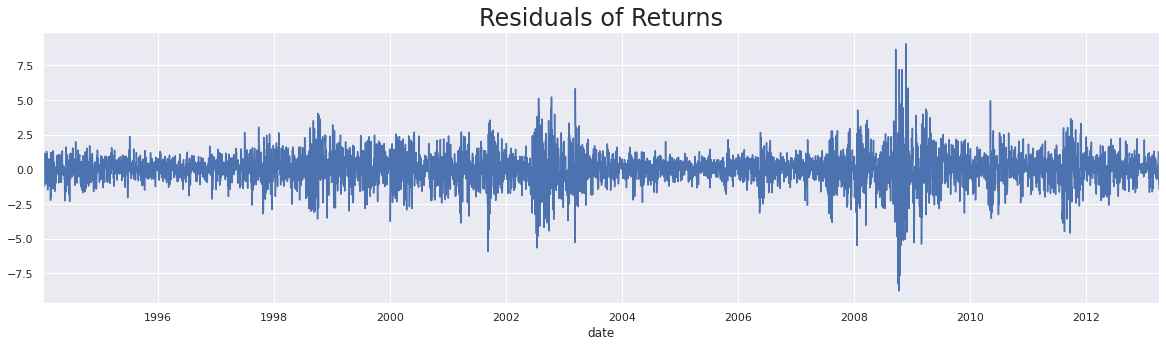

In [32]:
#Guassian noise implies normality
#residuals follow the normal distribution, so it is white noise

df.results_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [35]:
#we can check if residuals are white noise, 
#therefore if time series residuals are stationary
print("pvalue is",sts.adfuller(df.results_ret_ma_8[2:])[1])

pvalue is 0.0


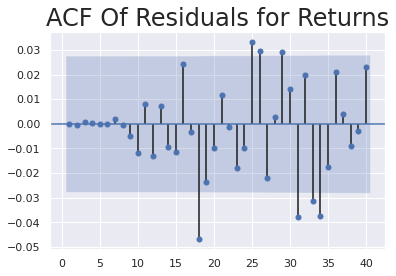

In [37]:
sgt.plot_acf(df.results_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()
#most of the coefficients are not significant at the start
#while far away coefficients alghough are significant they are of no interest
#because the markets are adjusted after a shock
#therefore far residuals are insignificant

Normalized data

In [38]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


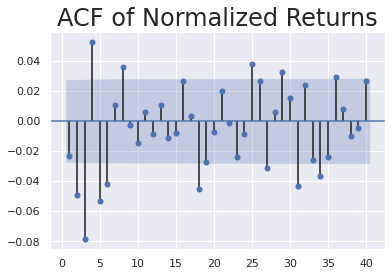

In [39]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()


In [43]:
#in the acf plot the most recent significant lag is the number 8
model_norm_ret_ma_7 = ARMA(df.norm_ret[1:], order=(0,7))
results_norm_ret_ma_7 = model_norm_ret_ma_7.fit()

model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
if(any(i >0.05 for i in results_norm_ret_ma_8.pvalues)):
  print(round(results_norm_ret_ma_8.pvalues,3))
print("LLR test        ",LLR_test(results_ret_ma_7, results_ret_ma_8))

const             0.176
ma.L1.norm_ret    0.091
ma.L2.norm_ret    0.000
ma.L3.norm_ret    0.000
ma.L4.norm_ret    0.001
ma.L5.norm_ret    0.000
ma.L6.norm_ret    0.005
ma.L7.norm_ret    0.557
ma.L8.norm_ret    0.009
dtype: float64
LLR test         0.0087


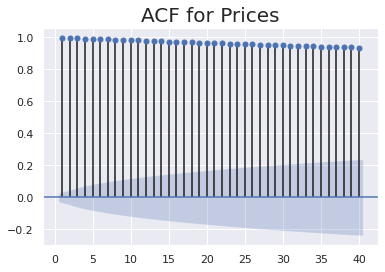

In [54]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [55]:
model_ma_1 = ARMA(df.market_value, order=(0,1))
results_ma_1 = model_ma_1.fit()
print(round(results_ma_1.pvalues,3))

const                 0.0
ma.L1.market_value    0.0
dtype: float64
